<a href="https://colab.research.google.com/github/PeregrinAl/Patterns/blob/main/BioRadio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Замените 'your_file.csv' на имя вашего файла
data = pd.read_csv('data_sasha_yu.csv', sep='\t')


data['Elapsed Time'] = pd.to_datetime(data['Elapsed Time'])
data = data.drop(['Unnamed: 3', 'BioRadio Event'], axis=1)
# Изменение сепаратора в столбце ECG1 на точку
data['ECG'] = data['ECG'].str.replace(',', '.')
# Преобразование ECG1 в числовой формат
data['ECG'] = pd.to_numeric(data['ECG'], errors='coerce')

data = data.iloc[5000:]

<ipython-input-6-dd66ead9860b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Elapsed Time'] = pd.to_datetime(data['Elapsed Time'])


In [7]:
print(data.head())

                Elapsed Time       ECG
5000 2024-10-23 00:00:10.000 -0.024070
5001 2024-10-23 00:00:10.002 -0.022880
5002 2024-10-23 00:00:10.004 -0.021840
5003 2024-10-23 00:00:10.006 -0.021393
5004 2024-10-23 00:00:10.008 -0.021780


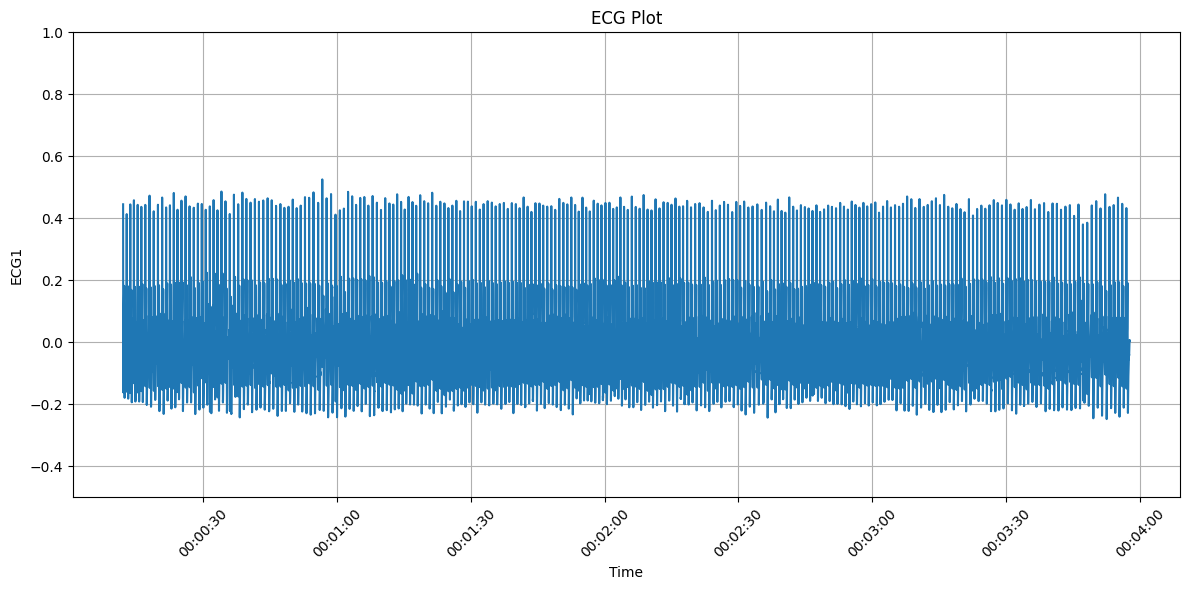

In [46]:
data.rename(columns={'ECG': 'ECG1'}, inplace=True)
# 3. Построение графика ЭКГ
# Параметры для изменения осей
start_index = 1000  # Начальный индекс
end_index = int(len(data) / 16) # Конечный индекс
y_min = -0.5 # Минимальное значение по Y
y_max = 1  # Максимальное значение по Y

plt.figure(figsize=(12, 6))
plt.plot(data['Elapsed Time'][start_index:end_index], data['ECG1'][start_index:end_index])
plt.title('ECG Plot')
plt.xlabel('Time')
plt.ylabel('ECG1')
plt.ylim(y_min, y_max)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [47]:
import numpy as np

# Определите пороговое значение для обнаружения P-зубцов
threshold = 0.4  # Пороговое значение, вы можете настроить его

# Находим индексы, где значения превышают порог
peaks = (data['ECG1'][start_index:end_index] > threshold).astype(int).diff().dropna()

# Получаем индексы P-зубцов
p_indices = peaks[peaks == 1].index

print(peaks[peaks == 1])

# Вычисляем расстояния между P-зубцами в миллисекундах
distances = []
for i in range(1, len(p_indices)):
    # Разница между индексами P-зубцов
    interval = data['Elapsed Time'][p_indices[i]] - data['Elapsed Time'][p_indices[i - 1]]
    # Преобразуем индексы в миллисекунды
    print(p_indices[i], p_indices[i - 1])
    distance_ms = (interval / len(data)) * 1000  # предположим, что у нас 1000 Гц
    distances.append(int(interval.microseconds / 1000))

# Сохраняем расстояния в массив
distances_array = np.array(distances)

print("Расстояния между P-зубцами (в мс):", distances_array)

6403      1.0
6802      1.0
7210      1.0
7632      1.0
8042      1.0
         ... 
116608    1.0
117072    1.0
117553    1.0
118028    1.0
118493    1.0
Name: ECG1, Length: 246, dtype: float64
6802 6403
7210 6802
7632 7210
8042 7632
8486 8042
8962 8486
9432 8962
9905 9432
10376 9905
10821 10376
11250 10821
11681 11250
12101 11681
12539 12101
13002 12539
13450 13002
13922 13450
14383 13922
14821 14383
15265 14821
15722 15265
16145 15722
16580 16145
17023 16580
17475 17023
17958 17475
18425 17958
18903 18425
19370 18903
19816 19370
20289 19816
20776 20289
21230 20776
21711 21230
22202 21711
22662 22202
23147 22662
23632 23147
24080 23632
24548 24080
25021 24548
25459 25021
25913 25459
26391 25913
26858 26391
27345 26858
27868 27345
28328 27868
28817 28328
29312 28817
29816 29312
30303 29816
30755 30303
31221 30755
31682 31221
32122 31682
32585 32122
33044 32585
33495 33044
33975 33495
34455 33975
34915 34455
35388 34915
35860 35388
36291 35860
36726 36291
37167 36726
37578 37167
38007 3

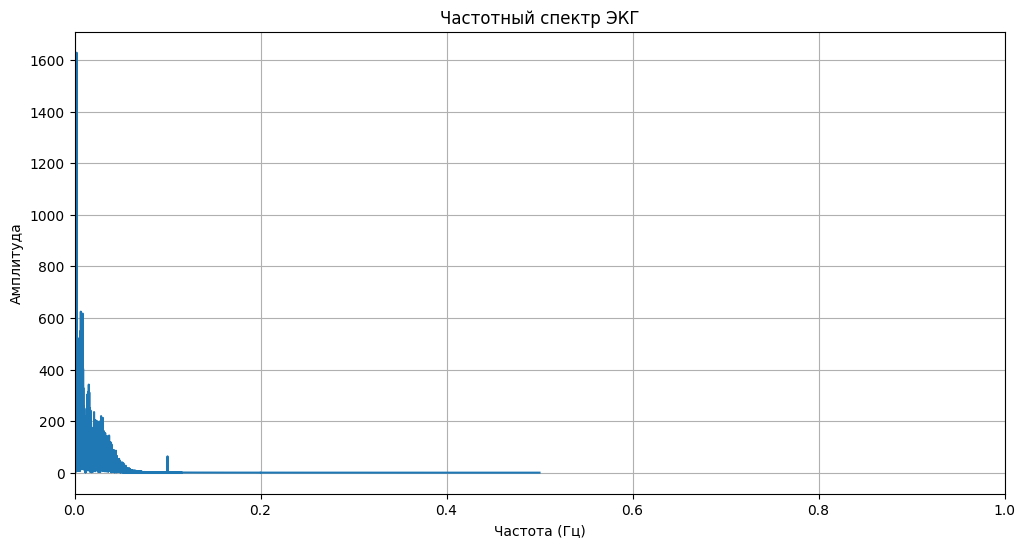

In [48]:
# Предположим, что у вас уже есть массив ECG1
ecg_signal = data['ECG1'][start_index:end_index].dropna().values  # Убедитесь, что у вас нет пропущенных значений
sampling_rate = 1  # Укажите частоту выборки в Гц

# Применяем быстрое преобразование Фурье
fourier_transform = np.fft.fft(ecg_signal)
n = len(ecg_signal)

# Получаем частоты
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Модуль преобразования (амплитуда)
magnitude = np.abs(fourier_transform)

# Ограничим частоты до положительных значений
positive_freqs = frequencies[:n//2]
positive_magnitude = magnitude[:n//2]

# 3. Построение графика
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title('Частотный спектр ЭКГ')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 1)  # Установите пределы по оси X, если нужно
plt.grid()
plt.show()


In [49]:
frequency_ranges = [
    (0, 0.04),    # Меньше 0.04
    (0.015, 0.04),  # 0.015 - 0.04
    (0.04, 0.15),  # 0.04 - 0.15
    (0.15, 0.4)    # 0.15 - 0.4
]

# Инициализируем список для сумм амплитуд
amplitude_sums = []

# Проходим по каждому диапазону частот
for freq_range in frequency_ranges:
    # Создаем маску для частот в данном диапазоне
    mask = (positive_freqs >= freq_range[0]) & (positive_freqs < freq_range[1])
    # Суммируем амплитуды для этого диапазона
    amplitude_sum = positive_magnitude[mask].sum()
    amplitude_sums.append(amplitude_sum)

# Выводим результаты
for i, freq_range in enumerate(frequency_ranges):
    print(f"Сумма амплитуды на диапазоне {freq_range}: {amplitude_sums[i]}")

Сумма амплитуды на диапазоне (0, 0.04): 408844.7837258907
Сумма амплитуды на диапазоне (0.015, 0.04): 197030.62547624687
Сумма амплитуды на диапазоне (0.04, 0.15): 53086.96401610831
Сумма амплитуды на диапазоне (0.15, 0.4): 8918.04037701796


In [50]:
# Сохраняем расстояния в массив
distances_array = np.array(distances)

print(distances_array.tolist())

[798, 816, 844, 820, 888, 952, 940, 946, 942, 890, 858, 862, 840, 876, 926, 896, 944, 922, 876, 888, 914, 846, 870, 886, 904, 966, 934, 956, 934, 892, 946, 974, 908, 962, 982, 920, 970, 970, 896, 936, 946, 876, 908, 956, 934, 974, 46, 920, 978, 990, 8, 974, 904, 932, 922, 880, 926, 918, 902, 960, 960, 920, 946, 944, 862, 870, 882, 822, 858, 876, 834, 896, 900, 878, 912, 922, 894, 928, 888, 894, 892, 842, 874, 876, 858, 916, 900, 846, 914, 936, 864, 910, 926, 876, 906, 900, 848, 900, 890, 852, 902, 898, 844, 900, 918, 874, 914, 910, 892, 896, 854, 814, 834, 828, 818, 880, 888, 840, 894, 898, 842, 812, 804, 820, 840, 904, 880, 874, 896, 884, 874, 918, 884, 912, 920, 858, 894, 860, 836, 914, 872, 924, 990, 904, 946, 938, 860, 902, 944, 884, 940, 920, 854, 906, 932, 964, 56, 986, 984, 908, 862, 872, 836, 834, 876, 886, 852, 882, 898, 832, 870, 884, 824, 882, 914, 860, 912, 930, 852, 878, 868, 830, 886, 894, 854, 896, 912, 848, 894, 916, 860, 914, 916, 874, 922, 938, 890, 952, 956, 882, 924